# Extracting Presseption and Presure Data From satelite

ERA5 Daily Aggregates - Latest Climate Reanalysis Produced by ECMWF / Copernicus Climate Change Service

Wind Direction based on

*   u (from west to east) in m/s
*   v (from south to north) in m/s



## Import library

In [ ]:
import os
import ee
import numpy as np
import pandas as pd
import time
import glob
import re

In [ ]:

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=Odf30GgQCjZFJIx6qdJH37Brs_bPA-VwplsUT2xzPxo&tc=MsWUSZU71d-jWt6R2oIZpy-zoxGFKI999Spi24Vy38c&cc=fMthw5QGVaaw3ME_1xMSiLbGkePKVfGJl4a2zwTXb1w

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VPGOoPoxTGSbh-N3xkzHvrdT_VmkJk1JcRUT0248gJ5WGLY4nAgb7c

Successfully saved authorization token.


## Loading DataSet

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [ ]:
eachfire='/content/gdrive/MyDrive/Thesis/data_output.csv'
eachfire = pd.read_csv(eachfire)
eachfire.drop(['Unnamed: 0','Unnamed: 0.1'], inplace=True, axis=1)


In [ ]:
eachfire

lat         lon      x     y   H  V    i    j       dtime  \
0        19.437500 -155.084888   4050  8467   3  7   67  450  2014-01-01   
1        19.437500 -155.076051   4051  8467   3  7   67  451  2014-01-01   
2        19.437500 -155.067214   4052  8467   3  7   67  452  2014-01-01   
3        19.437500 -155.058377   4053  8467   3  7   67  453  2014-01-01   
4        19.429167 -155.085766   4049  8468   3  7   68  449  2014-01-01   
...            ...         ...    ...   ...  .. ..  ...  ...         ...   
1432550  33.029167  -79.879981  13563  6836  11  5  836  363  2019-12-31   
1432551  33.020833  -79.892306  13561  6837  11  5  837  361  2019-12-31   
1432552  33.020833  -79.882368  13562  6837  11  5  837  362  2019-12-31   
1432553  33.020833  -79.872429  13563  6837  11  5  837  363  2019-12-31   
1432554  33.012500  -79.884756  13561  6838  11  5  838  361  2019-12-31   

         conf  maxFRP satellite                  neigh     t  \
0           9    1476       MYD  cloud (land or water)  4383   
1           9    1476       MYD  cloud (land or water)  4383   
2           9     955       MYD  cloud (land or water)  4383   
3           9     955       MYD  cloud (land or water)  4383   
4           9     299       MYD  cloud (land or water)  4383   
...       ...     ...       ...                    ...   ...   
1432550     8     136       MYD    non-fire land pixel  6573   
1432551     7     107       MYD   non-fire water pixel  6573   
1432552     8     136       MYD   non-fire water pixel  6573   
1432553     8     136       MYD    non-fire land pixel  6573   
1432554     7     107       MYD   non-fire water pixel  6573   

                          country      continent  neigh_int       gl        cp  
0        United States of America  North America          3     2919     32636  
1        United States of America  North America          3     2956     32636  
2        United States of America  North America          3     2996     32636  
3        United States of America  North America          3     3034     32636  
4        United States of America  North America          3     2884     32636  
...                           ...            ...        ...      ...       ...  
1432550  United States of America  North America          5  4027916  10248728  
1432551  United States of America  North America          4  4024780  10248728  
1432552  United States of America  North America          4  4026335  10248728  
1432553  United States of America  North America          5  4027917  10248728  
1432554  United States of America  North America          4  4024781  10248728  

[1432555 rows x 19 columns]

## Only take Interest part

In [ ]:
precipitation  = eachfire[['lon', 'lat','dtime','cp']].copy()

In [ ]:
precipitation

lon        lat       dtime        cp
0       -155.084888  19.437500  2014-01-01     32636
1       -155.076051  19.437500  2014-01-01     32636
2       -155.067214  19.437500  2014-01-01     32636
3       -155.058377  19.437500  2014-01-01     32636
4       -155.085766  19.429167  2014-01-01     32636
...             ...        ...         ...       ...
1432550  -79.879981  33.029167  2019-12-31  10248728
1432551  -79.892306  33.020833  2019-12-31  10248728
1432552  -79.882368  33.020833  2019-12-31  10248728
1432553  -79.872429  33.020833  2019-12-31  10248728
1432554  -79.884756  33.012500  2019-12-31  10248728

[1432555 rows x 4 columns]

In [ ]:
##Take per day in one area of fire
new_precipitation  = precipitation.drop_duplicates(
    subset=['cp','dtime'],
    keep='last').reset_index(drop=True).sort_values(['cp','dtime'])

new_precipitation

lon        lat       dtime        cp
217156 -154.932895  19.454167  2018-05-30        11
217182 -154.881637  19.437500  2018-05-31        11
217250 -154.871030  19.454167  2018-06-01        11
217321 -154.889588  19.445833  2018-06-02        11
217392 -154.891362  19.429167  2018-06-03        11
...            ...        ...         ...       ...
76317   -96.588897  32.287500  2015-08-23  36526726
152617  -94.693694  42.270833  2017-03-09  36526808
175666  -97.806507  48.470833  2017-08-30  36527114
76318   -94.459538  31.695833  2015-08-23  36527218
76322   -95.860392  30.045833  2015-08-23  36527322

[279960 rows x 4 columns]

In [ ]:
##Chuck divided into 120 part (To reduce error while extracting data)
list_df = np.array_split(new_precipitation, 120)

In [ ]:
list_df

[               lon        lat       dtime    cp
 217156 -154.932895  19.454167  2018-05-30    11
 217182 -154.881637  19.437500  2018-05-31    11
 217250 -154.871030  19.454167  2018-06-01    11
 217321 -154.889588  19.445833  2018-06-02    11
 217392 -154.891362  19.429167  2018-06-03    11
 ...            ...        ...         ...   ...
 168125 -112.725058  37.654167  2017-06-26  3315
 168251 -112.735583  37.654167  2017-06-27  3315
 228287 -110.591077  43.045833  2018-09-15  3347
 228414 -110.500442  43.020833  2018-09-16  3347
 228506 -110.523239  43.020833  2018-09-17  3347
 
 [2333 rows x 4 columns],                lon        lat       dtime     cp
 228690 -110.375061  43.020833  2018-09-18   3347
 228919 -110.496844  43.012500  2018-09-19   3347
 229146 -110.429109  42.987500  2018-09-20   3347
 229378 -110.406325  42.987500  2018-09-21   3347
 229490 -110.444083  42.995833  2018-09-22   3347
 ...            ...        ...         ...    ...
 205978  -81.555466  25.995833  201

## Extracting data from satellite Image collection ECMWF/ERA5/DAILY

In [ ]:
#Test for 1 location from satelite (Earth Engine)
ECMWF = ee.ImageCollection('ECMWF/ERA5/DAILY')

i_date = '2017-05-01'
#Take u_component_of_wind_10m
t_precipitation = ECMWF.select('total_precipitation').filterDate(i_date)
#Take v_component_of_wind_10m
t_pressure = ECMWF.select('surface_pressure').filterDate(i_date)
scale = 1000  # scale in meters
# Define the location of interest as a point.
u_lon = 4.8148
u_lat = 45.7758
u_poi = ee.Geometry.Point(u_lon, u_lat)
# Taking data
t_precipitation_data = t_precipitation.mean().sample(u_poi,scale).first().get('total_precipitation').getInfo()
t_pressure_data = t_pressure.mean().sample(u_poi,scale).first().get('surface_pressure').getInfo()
print(t_precipitation_data,t_pressure_data)

0.004762670025229454 97532.875


In [ ]:
#Connect to satelite image collection
ECMWF = ee.ImageCollection('ECMWF/ERA5/DAILY')
scale = 1000  # scale in meters

#Function grab info from satelite image collection
def prec_pres (lon,lat,date):
  t_precipitation = ECMWF.select('total_precipitation').filterDate(date)
  t_pressure = ECMWF.select('surface_pressure').filterDate(date)

  u_poi = ee.Geometry.Point(lon, lat)
  try:
    t_precipitation_data = t_precipitation.mean().sample(u_poi,scale).first().get('total_precipitation').getInfo()
    t_pressure_data = t_pressure.mean().sample(u_poi,scale).first().get('surface_pressure').getInfo()
  except:
    t_precipitation_data = "nan"
    t_pressure_data = "nan"
  return t_precipitation_data,t_pressure_data

In [ ]:
#Manipulating time to conect with server.
n = 37
while n <= 60:
  nodess = list_df[n].values.tolist()
  df = pd.DataFrame (nodess, columns = ['lon', 'lat','date','cp'])
  #Call Function
  df['prec_pres'] = df.apply(lambda x: prec_pres(x['lon'], x['lat'], x['date']), axis=1)
  no = str(n)
  #save to file
  df.to_csv('/content/gdrive/MyDrive/Thesis/precipitation_pressure_data'+ no +'.csv')
  time.sleep(5)
  print(no+'already')
  n += 1
  if n == 60:
    break


37already
38already
39already
40already
41already
42already
43already
44already
45already
46already
47already
48already
49already
50already
51already
52already
53already
54already
55already
56already
57already
58already
59already


## Prosesing Data

In [ ]:
# Looking all files
files = os.path.join("/content/gdrive/MyDrive/Thesis/", "precipitation_pressure_data*.csv")

In [ ]:
# Sorted, list all files and glob the files

files = glob.glob(files)
files = sorted(files, key=lambda x:float(re.findall("(\d+)",x)[0]))
files

['/content/gdrive/MyDrive/Thesis/precipitation_pressure_data0.csv',
 '/content/gdrive/MyDrive/Thesis/precipitation_pressure_data1.csv',
 '/content/gdrive/MyDrive/Thesis/precipitation_pressure_data2.csv',
 '/content/gdrive/MyDrive/Thesis/precipitation_pressure_data3.csv',
 '/content/gdrive/MyDrive/Thesis/precipitation_pressure_data4.csv',
 '/content/gdrive/MyDrive/Thesis/precipitation_pressure_data5.csv',
 '/content/gdrive/MyDrive/Thesis/precipitation_pressure_data6.csv',
 '/content/gdrive/MyDrive/Thesis/precipitation_pressure_data7.csv',
 '/content/gdrive/MyDrive/Thesis/precipitation_pressure_data8.csv',
 '/content/gdrive/MyDrive/Thesis/precipitation_pressure_data9.csv',
 '/content/gdrive/MyDrive/Thesis/precipitation_pressure_data10.csv',
 '/content/gdrive/MyDrive/Thesis/precipitation_pressure_data11.csv',
 '/content/gdrive/MyDrive/Thesis/precipitation_pressure_data12.csv',
 '/content/gdrive/MyDrive/Thesis/precipitation_pressure_data13.csv',
 '/content/gdrive/MyDrive/Thesis/precipitati

In [ ]:
# Combine into one Dataframe
precipitation_pressure = pd.concat(map(pd.read_csv, files), ignore_index=True)

In [ ]:
precipitation_pressure.drop(['Unnamed: 0'], inplace=True, axis=1)

In [ ]:
precipitation_pressure

lon        lat        date        cp  \
0      -154.932895  19.454167  2018-05-30        11   
1      -154.881637  19.437500  2018-05-31        11   
2      -154.871030  19.454167  2018-06-01        11   
3      -154.889588  19.445833  2018-06-02        11   
4      -154.891362  19.429167  2018-06-03        11   
...            ...        ...         ...       ...   
279955  -96.588897  32.287500  2015-08-23  36526726   
279956  -94.693694  42.270833  2017-03-09  36526808   
279957  -97.806507  48.470833  2017-08-30  36527114   
279958  -94.459538  31.695833  2015-08-23  36527218   
279959  -95.860392  30.045833  2015-08-23  36527322   

                                       prec_pres  
0           (0.017955902963876724, 100520.15625)  
1         (0.009141800925135612, 100457.1328125)  
2         (0.005192730575799942, 100338.3984375)  
3         (0.013090573251247406, 100192.5703125)  
4         (0.011645304039120674, 100371.2578125)  
...                                          ...  
279955        (4.87547367811203e-05, 99540.0625)  
279956    (2.427026629447937e-06, 97750.2421875)  
279957       (1.862645149230957e-09, 96989.3125)  
279958  (1.1174008250236511e-05, 100092.8515625)  
279959  (0.00010484457015991211, 100500.1015625)  

[279960 rows x 5 columns]

In [ ]:
# Delete '(' ')' in wind column
precipitation_pressure['prec_pres'] = precipitation_pressure['prec_pres'].map(lambda x: x.lstrip('(').rstrip(')'))

In [ ]:
# Seperate beetween u and v
precipitation_pressure[['precipitation','pressure']] = precipitation_pressure.prec_pres.str.split('[,]', expand=True)
precipitation_pressure.drop(['prec_pres'], inplace=True, axis=1)
precipitation_pressure

lon        lat        date        cp           precipitation  \
0      -154.932895  19.454167  2018-05-30        11    0.017955902963876724   
1      -154.881637  19.437500  2018-05-31        11    0.009141800925135612   
2      -154.871030  19.454167  2018-06-01        11    0.005192730575799942   
3      -154.889588  19.445833  2018-06-02        11    0.013090573251247406   
4      -154.891362  19.429167  2018-06-03        11    0.011645304039120674   
...            ...        ...         ...       ...                     ...   
279955  -96.588897  32.287500  2015-08-23  36526726    4.87547367811203e-05   
279956  -94.693694  42.270833  2017-03-09  36526808   2.427026629447937e-06   
279957  -97.806507  48.470833  2017-08-30  36527114   1.862645149230957e-09   
279958  -94.459538  31.695833  2015-08-23  36527218  1.1174008250236511e-05   
279959  -95.860392  30.045833  2015-08-23  36527322  0.00010484457015991211   

               pressure  
0          100520.15625  
1        100457.1328125  
2        100338.3984375  
3        100192.5703125  
4        100371.2578125  
...                 ...  
279955       99540.0625  
279956    97750.2421875  
279957       96989.3125  
279958   100092.8515625  
279959   100500.1015625  

[279960 rows x 6 columns]

## save dataset to csv

In [ ]:
precipitation_pressure.to_csv('/content/gdrive/MyDrive/Thesis/precipitation_pressure.csv')

In [ ]:
precipitation_pressure='/content/gdrive/MyDrive/Thesis/precipitation_pressure.csv'
precipitation_pressure = pd.read_csv(precipitation_pressure, index_col=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
precipitation_pressure

lon        lat        date        cp         precipitation  \
0      -154.932895  19.454167  2018-05-30        11  0.017955902963876724   
1      -154.881637  19.437500  2018-05-31        11  0.009141800925135612   
2      -154.871030  19.454167  2018-06-01        11  0.005192730575799942   
3      -154.889588  19.445833  2018-06-02        11  0.013090573251247406   
4      -154.891362  19.429167  2018-06-03        11  0.011645304039120674   
...            ...        ...         ...       ...                   ...   
279955  -96.588897  32.287500  2015-08-23  36526726              0.000049   
279956  -94.693694  42.270833  2017-03-09  36526808              0.000002   
279957  -97.806507  48.470833  2017-08-30  36527114                   0.0   
279958  -94.459538  31.695833  2015-08-23  36527218              0.000011   
279959  -95.860392  30.045833  2015-08-23  36527322              0.000105   

               pressure  
0          100520.15625  
1        100457.1328125  
2        100338.3984375  
3        100192.5703125  
4        100371.2578125  
...                 ...  
279955       99540.0625  
279956     97750.242188  
279957       96989.3125  
279958    100092.851562  
279959    100500.101562  

[279960 rows x 6 columns]

## Put in the data

In [ ]:
## Read Wind+Elevation+landcover+temp
wind_ele_land_temp='/content/gdrive/MyDrive/Thesis/Wind+Elevation+landcover+temp.csv'
wind_ele_land_temp = pd.read_csv(wind_ele_land_temp, index_col=0)

In [ ]:
wind_ele_land_temp

lon        lat        date        cp  elevation  \
0      -154.932895  19.454167  2018-05-30        11      309.0   
1      -154.881637  19.437500  2018-05-31        11       52.0   
2      -154.871030  19.454167  2018-06-01        11       66.0   
3      -154.889588  19.445833  2018-06-02        11       94.0   
4      -154.891362  19.429167  2018-06-03        11       56.0   
...            ...        ...         ...       ...        ...   
279955  -96.588897  32.287500  2015-08-23  36526726      148.0   
279956  -94.693694  42.270833  2017-03-09  36526808      368.0   
279957  -97.806507  48.470833  2017-08-30  36527114      345.0   
279958  -94.459538  31.695833  2015-08-23  36527218       88.0   
279959  -95.860392  30.045833  2015-08-23  36527322       72.0   

                   wind_direction  wind_speed landcover       temp  
0        47.02184700068143 degree    4.172772         2  23.080377  
1       47.515661076996146 degree    4.545328         2  22.545190  
2        42.67737631913129 degree    3.362955         2  22.030054  
3       54.189122824377094 degree    3.075476         8  30.750000  
4         59.7343020693647 degree    3.209143         8  25.630000  
...                           ...         ...       ...        ...  
279955   183.3791969987351 degree    3.053434        10  29.722222  
279956   40.08355088918048 degree    3.927866        12   3.055556  
279957  25.529026682813267 degree    3.839456        12  32.510000  
279958  200.67440348868902 degree    2.168040         8  26.110000  
279959  183.15345088172876 degree    2.030981        10  29.166667  

[279960 rows x 9 columns]

In [ ]:
precipitation_pressure.sort_values(['cp','date'])

lon        lat        date        cp         precipitation  \
0      -154.932895  19.454167  2018-05-30        11  0.017955902963876724   
1      -154.881637  19.437500  2018-05-31        11  0.009141800925135612   
2      -154.871030  19.454167  2018-06-01        11  0.005192730575799942   
3      -154.889588  19.445833  2018-06-02        11  0.013090573251247406   
4      -154.891362  19.429167  2018-06-03        11  0.011645304039120674   
...            ...        ...         ...       ...                   ...   
279955  -96.588897  32.287500  2015-08-23  36526726              0.000049   
279956  -94.693694  42.270833  2017-03-09  36526808              0.000002   
279957  -97.806507  48.470833  2017-08-30  36527114                   0.0   
279958  -94.459538  31.695833  2015-08-23  36527218              0.000011   
279959  -95.860392  30.045833  2015-08-23  36527322              0.000105   

               pressure  
0          100520.15625  
1        100457.1328125  
2        100338.3984375  
3        100192.5703125  
4        100371.2578125  
...                 ...  
279955       99540.0625  
279956     97750.242188  
279957       96989.3125  
279958    100092.851562  
279959    100500.101562  

[279960 rows x 6 columns]

In [ ]:
new_df = pd.merge(wind_ele_land_temp, precipitation_pressure,  how='left', left_on=['lon','lat','cp','date'], right_on = ['lon','lat','cp','date'])

In [ ]:
new_df.sort_values(['cp','date'])

lon        lat        date        cp  elevation  \
0      -154.932895  19.454167  2018-05-30        11      309.0   
1      -154.881637  19.437500  2018-05-31        11       52.0   
2      -154.871030  19.454167  2018-06-01        11       66.0   
3      -154.889588  19.445833  2018-06-02        11       94.0   
4      -154.891362  19.429167  2018-06-03        11       56.0   
...            ...        ...         ...       ...        ...   
279955  -96.588897  32.287500  2015-08-23  36526726      148.0   
279956  -94.693694  42.270833  2017-03-09  36526808      368.0   
279957  -97.806507  48.470833  2017-08-30  36527114      345.0   
279958  -94.459538  31.695833  2015-08-23  36527218       88.0   
279959  -95.860392  30.045833  2015-08-23  36527322       72.0   

                   wind_direction  wind_speed landcover       temp  \
0        47.02184700068143 degree    4.172772         2  23.080377   
1       47.515661076996146 degree    4.545328         2  22.545190   
2        42.67737631913129 degree    3.362955         2  22.030054   
3       54.189122824377094 degree    3.075476         8  30.750000   
4         59.7343020693647 degree    3.209143         8  25.630000   
...                           ...         ...       ...        ...   
279955   183.3791969987351 degree    3.053434        10  29.722222   
279956   40.08355088918048 degree    3.927866        12   3.055556   
279957  25.529026682813267 degree    3.839456        12  32.510000   
279958  200.67440348868902 degree    2.168040         8  26.110000   
279959  183.15345088172876 degree    2.030981        10  29.166667   

               precipitation         pressure  
0       0.017955902963876724     100520.15625  
1       0.009141800925135612   100457.1328125  
2       0.005192730575799942   100338.3984375  
3       0.013090573251247406   100192.5703125  
4       0.011645304039120674   100371.2578125  
...                      ...              ...  
279955              0.000049       99540.0625  
279956              0.000002     97750.242188  
279957                   0.0       96989.3125  
279958              0.000011    100092.851562  
279959              0.000105    100500.101562  

[279960 rows x 11 columns]

In [ ]:
new_df.to_csv('/content/gdrive/MyDrive/Thesis/wind_ele_land_temp_preciptation.csv')

In [ ]:
data='/content/gdrive/MyDrive/Thesis/wind_ele_land_temp_preciptation.csv'
data = pd.read_csv(data , index_col=0, header=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data

lon        lat        date        cp  elevation  \
0      -154.932895  19.454167  2018-05-30        11      309.0   
1      -154.881637  19.437500  2018-05-31        11       52.0   
2      -154.871030  19.454167  2018-06-01        11       66.0   
3      -154.889588  19.445833  2018-06-02        11       94.0   
4      -154.891362  19.429167  2018-06-03        11       56.0   
...            ...        ...         ...       ...        ...   
279955  -96.588897  32.287500  2015-08-23  36526726      148.0   
279956  -94.693694  42.270833  2017-03-09  36526808      368.0   
279957  -97.806507  48.470833  2017-08-30  36527114      345.0   
279958  -94.459538  31.695833  2015-08-23  36527218       88.0   
279959  -95.860392  30.045833  2015-08-23  36527322       72.0   

                   wind_direction  wind_speed landcover       temp  \
0        47.02184700068143 degree    4.172772         2  23.080377   
1       47.515661076996146 degree    4.545328         2  22.545190   
2        42.67737631913129 degree    3.362955         2  22.030054   
3       54.189122824377094 degree    3.075476         8  30.750000   
4         59.7343020693647 degree    3.209143         8  25.630000   
...                           ...         ...       ...        ...   
279955   183.3791969987351 degree    3.053434        10  29.722222   
279956   40.08355088918048 degree    3.927866        12   3.055556   
279957  25.529026682813267 degree    3.839456        12  32.510000   
279958  200.67440348868902 degree    2.168040         8  26.110000   
279959  183.15345088172876 degree    2.030981        10  29.166667   

               precipitation         pressure  
0       0.017955902963876724     100520.15625  
1       0.009141800925135612   100457.1328125  
2       0.005192730575799942   100338.3984375  
3       0.013090573251247406   100192.5703125  
4       0.011645304039120674   100371.2578125  
...                      ...              ...  
279955              0.000049       99540.0625  
279956              0.000002     97750.242188  
279957                   0.0       96989.3125  
279958              0.000011    100092.851562  
279959              0.000105    100500.101562  

[279960 rows x 11 columns]

### baru

In [ ]:
full='/content/gdrive/MyDrive/Thesis/wind_ele_land_temp_preciptation_frp_full.csv'
full = pd.read_csv(full)
full.drop(['Unnamed: 0'], inplace=True, axis=1)


<ipython-input-71-3aec3c844958>:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  full = pd.read_csv(full)


In [ ]:
full = full[full['precipitation'] != 0 ]

In [ ]:
new_df='/content/gdrive/MyDrive/Thesis/wind_ele_land_temp_preciptation_frp_full.csv'
new_df = pd.read_csv(new_df)
new_df.drop(['Unnamed: 0'], inplace=True, axis=1)


<ipython-input-5-d1b3ee23c852>:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv(new_df)


In [ ]:
new_df = new_df[new_df['precipitation'] == 0 ]

In [ ]:
full[full['cp'] == 44 ]

lon        lat        date  cp  elevation  \
272483 -144.043286  66.279167  2019-06-25  44      196.0   
272484 -144.028816  66.287500  2019-06-26  44      213.0   
272485 -144.035069  66.295833  2019-06-27  44      210.0   
272486 -144.076527  66.295833  2019-06-28  44      196.0   
272487 -143.995625  66.270833  2019-06-29  44      194.0   
272488 -143.829958  66.270833  2019-06-30  44      250.0   
272489 -143.848508  66.295833  2019-07-01  44      251.0   
272490 -143.773989  66.279167  2019-07-02  44      259.0   
272491 -143.883762  66.287500  2019-07-03  44      232.0   
272492 -143.993611  66.295833  2019-07-04  44      214.0   
272493 -143.844490  66.262500  2019-07-05  44      247.0   
272494 -143.846686  66.237500  2019-07-06  44      256.0   
272495 -143.906595  66.262500  2019-07-07  44      228.0   
272496 -143.900405  66.254167  2019-07-08  44      228.0   
272497 -143.906595  66.262500  2019-07-09  44      228.0   
272498 -143.892083  66.270833  2019-07-10  44      234.0   
272499 -143.892083  66.270833  2019-07-11  44      234.0   
272500 -143.854663  66.387500  2019-07-12  44      234.0   
272501 -143.892043  66.354167  2019-07-13  44      252.0   
272502 -143.846373  66.320833  2019-07-14  44      244.0   
272503 -143.825624  66.320833  2019-07-15  44      258.0   
272504 -143.769560  66.329167  2019-07-16  44      248.0   
272505 -143.701126  66.320833  2019-07-17  44      181.0   
272506 -143.701126  66.320833  2019-07-18  44      181.0   
272507 -143.659627  66.320833  2019-07-19  44      229.0   
272508 -143.707291  66.329167  2019-07-20  44      170.0   
272509 -143.615789  66.345833  2019-07-21  44      234.0   
272510 -143.680377  66.320833  2019-07-22  44      198.0   
272511 -143.659627  66.320833  2019-07-23  44      229.0   
272512 -143.653484  66.312500  2019-07-24  44      217.0   
272513 -143.688820  66.304167  2019-07-25  44      181.0   
272514 -143.259261  66.512500  2019-07-26  44      214.0   
272515 -143.248113  66.554167  2019-07-27  44      255.0   

                   wind_direction  wind_speed landcover       temp  \
272483   334.9301957362663 degree    2.334427         8  19.510000   
272484   85.92338136439125 degree    1.185893         1  23.970000   
272485  240.15785230078265 degree    1.980267         1  19.523584   
272486  247.10159983672796 degree    2.620272         8  20.750000   
272487  277.56069149503355 degree    1.900149         8  30.870000   
272488   280.1597899364541 degree    3.030889         8  27.890000   
272489   254.5529066447033 degree    4.220045         1  31.750000   
272490   258.8992744079563 degree    2.177177         8  17.789972   
272491   254.7616926359705 degree    2.241010         1  20.193018   
272492   259.0314378645823 degree    3.764858         8  31.810000   
272493   244.6599985053657 degree    3.217300         5  24.410000   
272494   302.0914786848935 degree    2.761986         4  23.407861   
272495   88.61920745547049 degree    1.159892         1  29.530000   
272496   81.91898035272347 degree    1.801626         5  24.332422   
272497  106.19889006186573 degree    1.813545         1  29.470000   
272498  248.60882467349418 degree    1.456563         1  25.197321   
272499     51.643513488494 degree    3.181588         1  20.323663   
272500   63.59147994235435 degree    2.150078         8  34.150000   
272501  209.48563626051055 degree    1.714672         8  18.588556   
272502  234.53125427193183 degree    3.448015         8  31.650000   
272503  229.24116084500872 degree    3.056035         8  32.950000   
272504  233.66676404058984 degree    2.466943         1  35.730000   
272505  230.93755539657593 degree    1.644832         8  21.398340   
272506  228.75990870094208 degree    1.018543         8  28.170000   
272507  246.95686844985545 degree    3.927395         8  21.658258   
272508  240.69708113296008 degree    4.574784         8  30.070000   
272509  245.72537717878728 degree    4.474518         8  18.862299   
272510   246.4

In [ ]:
hell = new_df.groupby(['cp']).size().reset_index(name='counts').sort_values(by = ['counts'], ascending = [False])
hell[hell['counts'] >= 2 ]

cp  counts
23    5634       9
7     2201       6
0       44       6
62   16380       5
36    7637       5
..     ...     ...
126  45185       2
134  51041       2
63   17121       2
131  50261       2
64   17143       2

[184 rows x 2 columns]

In [ ]:
new_pre = new_df[['lon', 'lat','date','cp']].copy()

In [ ]:
new_pre = new_pre.drop_duplicates(
    subset=['cp','date'],
    keep='last').reset_index(drop=True).sort_values(['cp','date'])

new_pre

lon        lat        date        cp
4394 -144.028816  66.287500  2019-06-26        44
4395 -143.995625  66.270833  2019-06-29        44
4396 -143.829958  66.270833  2019-06-30        44
4397 -143.773989  66.279167  2019-07-02        44
4398 -143.906595  66.262500  2019-07-07        44
...          ...        ...         ...       ...
4389  -86.892536  35.870833  2017-03-09  36520087
4390 -116.125381  33.654167  2015-05-29  36522569
4391 -110.860154  33.420833  2015-05-29  36522864
4392 -118.991726  47.004167  2016-06-03  36523389
4393  -84.235832  31.654167  2017-03-09  36523435

[5637 rows x 4 columns]

In [ ]:
##spilt data so easy to extract and avoid error while chatch
new_list_df = np.array_split(new_pre, 10)

In [ ]:
new_list_df

[             lon        lat        date      cp
 4394 -144.028816  66.287500  2019-06-26      44
 4395 -143.995625  66.270833  2019-06-29      44
 4396 -143.829958  66.270833  2019-06-30      44
 4397 -143.773989  66.279167  2019-07-02      44
 4398 -143.906595  66.262500  2019-07-07      44
 ...          ...        ...         ...     ...
 4953 -151.865349  63.787500  2015-08-04  720635
 4954 -151.832246  63.770833  2015-08-07  720635
 4955 -151.219130  66.045833  2015-08-04  722905
 4956 -151.219130  66.045833  2015-08-05  722905
 4957 -142.280203  62.712500  2018-07-31  726660
 
 [564 rows x 4 columns],
              lon        lat        date        cp
 4958 -153.697891  63.687500  2015-07-06    727394
 4959 -147.327596  64.412500  2019-07-10    733410
 4960 -152.614841  66.045833  2015-07-23    735476
 4961 -160.315245  61.262500  2016-07-17    750303
 4962 -160.531154  65.287500  2019-07-10    753966
 ...          ...        ...         ...       ...
 5517 -142.051742  68.362500

In [ ]:
#Test for 1 location from satelite (Earth Engine)
ECMWF =ee.ImageCollection("ECMWF/ERA5_LAND/DAILY_AGGR")

i_date = '2019-07-09'
#Take u_component_of_wind_10m
t_precipitation = ECMWF.select('total_precipitation_sum').filterDate(i_date)
#Take v_component_of_wind_10m
#t_pressure = ECMWF.select('surface_pressure').filterDate(i_date)
scale = 1000  # scale in meters
# Define the location of interest as a point.
u_lon = -143.906595
u_lat = 66.262500
u_poi = ee.Geometry.Point(u_lon, u_lat)
# Taking data
t_precipitation_data = t_precipitation.mean().sample(u_poi,scale).first().get('total_precipitation_sum').getInfo()
#t_precipitation_data_min = t_precipitation.mean().sample(u_poi,scale).first().get('total_precipitation_min').getInfo()
#t_pressure_data = t_pressure.mean().sample(u_poi,scale).first().get('surface_pressure').getInfo()
print(t_precipitation_data)

8.583068797918258e-07


In [ ]:
#Connect to satelite image SRTM
ECMWF =ee.ImageCollection("ECMWF/ERA5_LAND/DAILY_AGGR")
#Function grab info from satelite image collection
def ECMWF_extract (u_lon,u_lat,date):
    #Geometry Point
    t_precipitation = ECMWF.select('total_precipitation_sum').filterDate(date)
    scale = 1000
    u_poi = ee.Geometry.Point(u_lon, u_lat)
    try:
      t_precipitation_data = t_precipitation.mean().sample(u_poi,scale).first().get('total_precipitation_sum').getInfo()
    except:
      t_precipitation_data = 0
    return t_precipitation_data


In [ ]:
#Manipulating time to conect with server.
n = 0
while n <= 10:
  nodess = new_list_df[n].values.tolist()
  df = pd.DataFrame (nodess, columns = ['lon', 'lat','date','cp'])
  #Call Function
  df['precipitation'] = df.apply(lambda x: ECMWF_extract(x['lon'], x['lat'],x['date']), axis=1)
  no = str(n)
  #save to file
  df.to_csv('/content/gdrive/MyDrive/Thesis/precipt_data_G'+ no +'.csv')
  time.sleep(5)
  print(no+'already')
  n += 1
  if n == 10:
    break


0already
1already
2already
3already
4already
5already
6already
7already
8already
9already


In [ ]:
# Looking all files
files = os.path.join("/content/gdrive/MyDrive/Thesis/", "precipt_data_G*.csv")

In [ ]:
# Sorted, list all files and glob the files

files = glob.glob(files)
files = sorted(files, key=lambda x:float(re.findall("(\d+)",x)[0]))
files

['/content/gdrive/MyDrive/Thesis/precipt_data_G0.csv',
 '/content/gdrive/MyDrive/Thesis/precipt_data_G1.csv',
 '/content/gdrive/MyDrive/Thesis/precipt_data_G2.csv',
 '/content/gdrive/MyDrive/Thesis/precipt_data_G3.csv',
 '/content/gdrive/MyDrive/Thesis/precipt_data_G4.csv',
 '/content/gdrive/MyDrive/Thesis/precipt_data_G5.csv',
 '/content/gdrive/MyDrive/Thesis/precipt_data_G6.csv',
 '/content/gdrive/MyDrive/Thesis/precipt_data_G7.csv',
 '/content/gdrive/MyDrive/Thesis/precipt_data_G8.csv',
 '/content/gdrive/MyDrive/Thesis/precipt_data_G9.csv']

In [ ]:
# Combine into one Dataframe
pre_complete_new = pd.concat(map(pd.read_csv, files), ignore_index=True)

In [ ]:
pre_complete_new.drop(['Unnamed: 0'], inplace=True, axis=1)

In [ ]:
pre_complete_new

lon        lat        date        cp  precipitation
0    -144.028816  66.287500  2019-06-26        44   0.000000e+00
1    -143.995625  66.270833  2019-06-29        44   9.216821e-06
2    -143.829958  66.270833  2019-06-30        44   0.000000e+00
3    -143.773989  66.279167  2019-07-02        44   0.000000e+00
4    -143.906595  66.262500  2019-07-07        44   1.716614e-06
...          ...        ...         ...       ...            ...
5632  -86.892536  35.870833  2017-03-09  36520087   0.000000e+00
5633 -116.125381  33.654167  2015-05-29  36522569   8.523464e-07
5634 -110.860154  33.420833  2015-05-29  36522864   8.523464e-07
5635 -118.991726  47.004167  2016-06-03  36523389   1.719594e-06
5636  -84.235832  31.654167  2017-03-09  36523435   0.000000e+00

[5637 rows x 5 columns]

In [ ]:
new_df = new_df.drop('precipitation', axis=1)

In [ ]:
full_new_df = pd.merge(new_df, pre_complete_new,  how='left', left_on=['lon','lat'	,'cp','date'], right_on = ['lon','lat'	,'cp','date'])

In [ ]:
full_new_df

lon        lat        date        cp  elevation  \
0     -77.722633  38.987500  2014-10-26  35053243      126.0   
1     -98.041033  48.812500  2017-09-06  35053280      468.0   
2     -84.091850  31.937500  2016-02-28  35053878      105.0   
3     -90.431538  29.654167  2017-02-09  35053966        6.0   
4     -80.783989  35.870833  2014-10-26  35054002      259.0   
...          ...        ...         ...       ...        ...   
5632 -152.911731  64.420833  2015-08-07  36467018      262.0   
5633 -151.874573  63.754167  2015-08-07  36470138      218.0   
5634 -153.692814  64.029167  2015-08-07  36470747      456.0   
5635 -154.494103  64.612500  2015-08-07  36471547       62.0   
5636 -146.869839  61.237500  2016-09-03  36497365      975.0   

                 wind_direction  wind_speed landcover       temp  \
0     287.17217660653563 degree    3.685240         9  15.000000   
1     303.02295756275976 degree    1.967241        12  30.030000   
2     238.17181236719793 degree    2.061441        10  18.310000   
3      359.1956982163424 degree    2.220231         9  19.310000   
4      278.4054479426646 degree    2.902784         8  17.548151   
...                         ...         ...       ...        ...   
5632  231.82222351210305 degree    1.359969         8  28.430000   
5633   240.7677562300319 degree    1.434939         9  23.790000   
5634  226.70092515442698 degree    1.297635         8  29.290000   
5635   239.7654716837494 degree    0.989597         8  25.790000   
5636   298.0379637565625 degree    0.368127        16   4.070000   

           pressure  maxFRP  precipitation  
0        98816.6875      46   2.139807e-06  
1      97004.429688     104   8.702277e-07  
2     100968.492188      67   2.998695e-06  
3     101902.335938     334   8.523463e-07  
4         97384.375      91   2.139807e-06  
...             ...     ...            ...  
5632   97688.054688     543   0.000000e+00  
5633   97747.023438     364   0.000000e+00  
5634   97667.164062     210   0.000000e+00  
5635   99896.007812      44   0.000000e+00  
5636   88508.148438     105   2.276995e-06  

[5637 rows x 12 columns]

In [ ]:
full

lon        lat        date        cp  elevation  \
0      -154.932895  19.454167  2018-05-30        11      309.0   
1      -154.881637  19.437500  2018-05-31        11       52.0   
2      -154.871030  19.454167  2018-06-01        11       66.0   
3      -154.889588  19.445833  2018-06-02        11       94.0   
4      -154.891362  19.429167  2018-06-03        11       56.0   
...            ...        ...         ...       ...        ...   
279950 -155.157348  64.370833  2015-08-07  36466555      175.0   
279951 -155.272893  64.445833  2015-08-07  36466701      171.0   
279953 -147.941131  63.787500  2015-08-07  36469587     1773.0   
279957 -157.212079  64.487500  2015-08-07  36471694      534.0   
279958 -142.545731  61.787500  2016-09-03  36487813     1600.0   

                   wind_direction  wind_speed landcover       temp  \
0        47.02184700068143 degree    4.172772         2  23.080377   
1       47.515661076996146 degree    4.545328         2  22.545190   
2        42.67737631913129 degree    3.362955         2  22.030054   
3       54.189122824377094 degree    3.075476         8  30.750000   
4         59.7343020693647 degree    3.209143         8  25.630000   
...                           ...         ...       ...        ...   
279950  232.34983231171293 degree    1.533533         8  16.711664   
279951  230.57169133728524 degree    1.615777         8  16.372797   
279953   309.5137631752315 degree    0.696602        16  19.630000   
279957  228.54794791676892 degree    1.790092         8  22.410000   
279958  213.94376596845223 degree    1.274478        15   2.230000   

               precipitation         pressure  maxFRP  
0       0.017955902963876724     100520.15625    2170  
1       0.009141800925135612   100457.1328125    1022  
2       0.005192730575799942   100338.3984375     219  
3       0.013090573251247406   100192.5703125      71  
4       0.011645304039120674   100371.2578125      51  
...                      ...              ...     ...  
279950              0.000001     99288.960938     255  
279951              0.000003       98885.0625     111  
279953              0.000229     89513.195312      64  
279957              0.000001     98757.085938     251  
279958              0.000005        79575.625      83  

[274323 rows x 12 columns]

In [ ]:
concat = [full, full_new_df]
result = pd.concat(concat)
result

lon        lat        date        cp  elevation  \
0    -154.932895  19.454167  2018-05-30        11      309.0   
1    -154.881637  19.437500  2018-05-31        11       52.0   
2    -154.871030  19.454167  2018-06-01        11       66.0   
3    -154.889588  19.445833  2018-06-02        11       94.0   
4    -154.891362  19.429167  2018-06-03        11       56.0   
...          ...        ...         ...       ...        ...   
5632 -152.911731  64.420833  2015-08-07  36467018      262.0   
5633 -151.874573  63.754167  2015-08-07  36470138      218.0   
5634 -153.692814  64.029167  2015-08-07  36470747      456.0   
5635 -154.494103  64.612500  2015-08-07  36471547       62.0   
5636 -146.869839  61.237500  2016-09-03  36497365      975.0   

                 wind_direction  wind_speed landcover       temp  \
0      47.02184700068143 degree    4.172772         2  23.080377   
1     47.515661076996146 degree    4.545328         2  22.545190   
2      42.67737631913129 degree    3.362955         2  22.030054   
3     54.189122824377094 degree    3.075476         8  30.750000   
4       59.7343020693647 degree    3.209143         8  25.630000   
...                         ...         ...       ...        ...   
5632  231.82222351210305 degree    1.359969         8  28.430000   
5633   240.7677562300319 degree    1.434939         9  23.790000   
5634  226.70092515442698 degree    1.297635         8  29.290000   
5635   239.7654716837494 degree    0.989597         8  25.790000   
5636   298.0379637565625 degree    0.368127        16   4.070000   

             precipitation         pressure  maxFRP  
0     0.017955902963876724     100520.15625    2170  
1     0.009141800925135612   100457.1328125    1022  
2     0.005192730575799942   100338.3984375     219  
3     0.013090573251247406   100192.5703125      71  
4     0.011645304039120674   100371.2578125      51  
...                    ...              ...     ...  
5632                   0.0     97688.054688     543  
5633                   0.0     97747.023438     364  
5634                   0.0     97667.164062     210  
5635                   0.0     99896.007812      44  
5636              0.000002     88508.148438     105  

[279960 rows x 12 columns]

In [ ]:
result.to_csv('/content/gdrive/MyDrive/Thesis/wind_ele_land_temp_preciptation_new_frp_full.csv')

In [ ]:
frp  = eachfire[['lon', 'lat','dtime','cp','maxFRP']].copy()

In [ ]:
frp = frp.rename(columns={'dtime': 'date'})

In [ ]:
frp

lon        lat        date        cp  maxFRP
0       -155.084888  19.437500  2014-01-01     32636    1476
1       -155.076051  19.437500  2014-01-01     32636    1476
2       -155.067214  19.437500  2014-01-01     32636     955
3       -155.058377  19.437500  2014-01-01     32636     955
4       -155.085766  19.429167  2014-01-01     32636     299
...             ...        ...         ...       ...     ...
1432550  -79.879981  33.029167  2019-12-31  10248728     136
1432551  -79.892306  33.020833  2019-12-31  10248728     107
1432552  -79.882368  33.020833  2019-12-31  10248728     136
1432553  -79.872429  33.020833  2019-12-31  10248728     136
1432554  -79.884756  33.012500  2019-12-31  10248728     107

[1432555 rows x 5 columns]

In [ ]:
new_df = pd.merge(data, frp,  how='left', left_on=['lon','lat','cp','date'], right_on = ['lon','lat','cp','date'])

In [ ]:
new_df.to_csv('/content/gdrive/MyDrive/Thesis/wind_ele_land_temp_preciptation_frp.csv')

In [ ]:
new_df='/content/gdrive/MyDrive/Thesis/.csv'
new_df = pd.read_csv(new_df)
new_df.drop(['Unnamed: 0'], inplace=True, axis=1)


<ipython-input-3-2704d51dcca6>:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv(new_df)


In [ ]:
new_df

lon        lat        date        cp  elevation  \
0      -154.932895  19.454167  2018-05-30        11      309.0   
1      -154.881637  19.437500  2018-05-31        11       52.0   
2      -154.871030  19.454167  2018-06-01        11       66.0   
3      -154.889588  19.445833  2018-06-02        11       94.0   
4      -154.891362  19.429167  2018-06-03        11       56.0   
...            ...        ...         ...       ...        ...   
279955  -96.588897  32.287500  2015-08-23  36526726      148.0   
279956  -94.693694  42.270833  2017-03-09  36526808      368.0   
279957  -97.806507  48.470833  2017-08-30  36527114      345.0   
279958  -94.459538  31.695833  2015-08-23  36527218       88.0   
279959  -95.860392  30.045833  2015-08-23  36527322       72.0   

                   wind_direction  wind_speed landcover       temp  \
0        47.02184700068143 degree    4.172772         2  23.080377   
1       47.515661076996146 degree    4.545328         2  22.545190   
2        42.67737631913129 degree    3.362955         2  22.030054   
3       54.189122824377094 degree    3.075476         8  30.750000   
4         59.7343020693647 degree    3.209143         8  25.630000   
...                           ...         ...       ...        ...   
279955   183.3791969987351 degree    3.053434        10  29.722222   
279956   40.08355088918048 degree    3.927866        12   3.055556   
279957  25.529026682813267 degree    3.839456        12  32.510000   
279958  200.67440348868902 degree    2.168040         8  26.110000   
279959  183.15345088172876 degree    2.030981        10  29.166667   

               precipitation         pressure  maxFRP  duration  
0       0.017955902963876724     100520.15625    2170        71  
1       0.009141800925135612   100457.1328125    1022        71  
2       0.005192730575799942   100338.3984375     219        71  
3       0.013090573251247406   100192.5703125      71        71  
4       0.011645304039120674   100371.2578125      51        71  
...                      ...              ...     ...       ...  
279955              0.000049       99540.0625      75         1  
279956              0.000002     97750.242188      53         1  
279957                   0.0       96989.3125     205         1  
279958              0.000011    100092.851562      56         1  
279959              0.000105    100500.101562      81         1  

[279960 rows x 13 columns]

In [ ]:
more = new_df.groupby(['cp']).size().sort_values(ascending=False).reset_index(name='duration')
more

cp  duration
0            529       107
1            845        75
2             11        71
3           2482        67
4           1667        59
...          ...       ...
247390  14325220         1
247391  14325318         1
247392  14325510         1
247393  14325712         1
247394  36527322         1

[247395 rows x 2 columns]

In [ ]:
new_df = pd.merge(new_df, more,  how='left', left_on=['cp'], right_on = ['cp'])

In [ ]:
new_df = new_df[new_df['pressure'] != " 'nan'"]

In [ ]:
new_df['precipitation'] = pd.to_numeric(new_df['precipitation'])

<ipython-input-18-abd000f038f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['precipitation'] = pd.to_numeric(new_df['precipitation'])


In [ ]:
hell = new_df.groupby(['duration'])['precipitation'].mean().reset_index()

<Axes: xlabel='duration', ylabel='precipitation'>

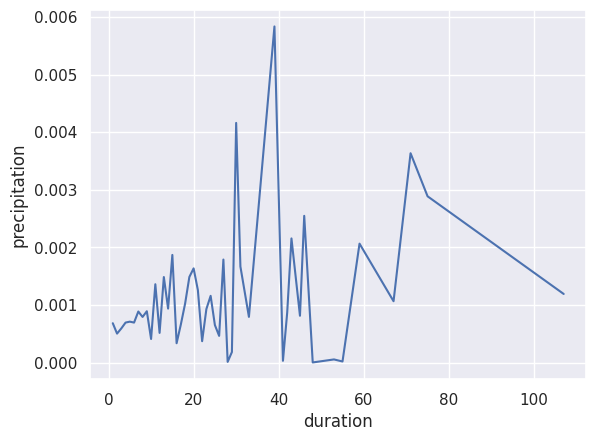

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.lineplot(x='duration', y='precipitation', data=hell)

# other aproach wind calculation
wind data done in previous line
its just another code for calculation

In [ ]:
wind_abs = math.sqrt((lst_urban_u*lst_urban_u) + (lst_urban_v*lst_urban_v))
wind_dir_trig_to = math.atan2(lst_urban_u/wind_abs, lst_urban_v/wind_abs)
wind_dir_trig_to_degrees = wind_dir_trig_to * (180/math.pi) ## -111.6 degrees

In [ ]:
#convert this wind vector to the meteorological convention of the direction the wind is coming from:
wind_dir_trig_from_degrees = wind_dir_trig_to_degrees + 180 ## 68.38 degrees

In [ ]:
#convert that angle from "trig" coordinates to cardinal coordinates:
wind_dir_cardinal = 90 - wind_dir_trig_from_degrees
wind_dir_cardinal